In [1]:
import sklearn

# Regression MLPs

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [7]:
rmse

0.5053326657968523

In [ ]:
"C:\Users\Dell\Desktop\Deep-learning\mlp regression.png"

**Note**: Building and training a standard MLP with Scikit-Learn in just a few lines of code is very
convenient, but the neural net features are limited. This is why we will switch to Keras later.

# Classification MLPs


MLPs can also be used for classification tasks. For a binary classification
problem, you just need a single output neuron using the sigmoid activation
function: the output will be a number between 0 and 1, which you can
interpret as the estimated probability of the positive class. The estimated
probability of the negative class is equal to one minus that number.

In [ ]:
"C:\Users\Dell\Desktop\Deep-learning\mlp classifier.png"

# Implementing MLPs with Keras


Keras is TensorFlow’s high-level deep learning API: it allows you to build,
train, evaluate, and execute all sorts of neural networks. The original Keras
library was developed by François Chollet as part of a research project
and was released as a standalone open source project in March 2015. It
quickly gained popularity, owing to its ease of use, flexibility, and beautiful
design.


Now let’s use Keras! We will start by building an MLP for image
classification.

In [8]:
import tensorflow as tf


**Building an Image Classifier Using the Sequential API**


First, we need to load a dataset. We will use Fashion MNIST, which is a
drop-in replacement of MNIST (The digits dataset). It has the exact
same format as MNIST (70,000 grayscale images of 28 × 28 pixels each,
with 10 classes), but the images represent fashion items rather than
handwritten digits, so each class is more diverse, and the problem turns out to
be significantly more challenging than MNIST. For example, a simple linear
model reaches about 92% accuracy on MNIST, but only about 83% on
Fashion MNIST.


**Using Keras to load the dataset**


Keras provides some utility functions to fetch and load common datasets,
including MNIST, Fashion MNIST, and a few more. Let’s load Fashion
MNIST. It’s already shuffled and split into a training set (60,000 images) and
a test set (10,000 images), but we’ll hold out the last 5,000 images from the
training set for validation:


In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 74s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [11]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

When loading MNIST or Fashion MNIST using Keras rather than ScikitLearn, one important difference is that every image is represented as a 28 ×
28 array rather than a 1D array of size 784. Moreover, the pixel intensities are
represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).
Let’s take a look at the shape and data type of the training set:

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [14]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

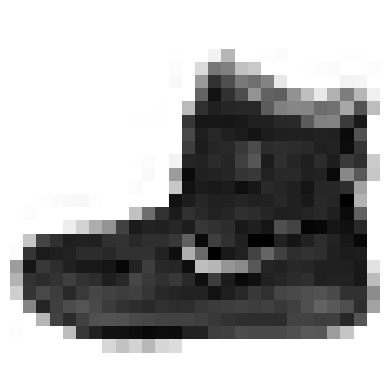

In [16]:
# plottinng the first  item in the training set
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

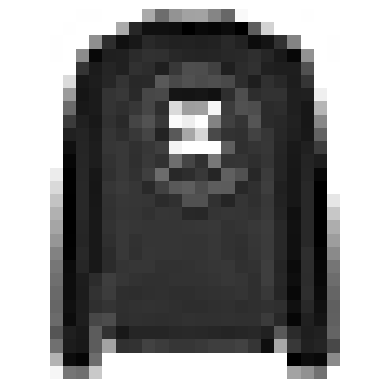

In [17]:
# plotting the last item in the train set
plt.imshow(X_train[-1], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

With MNIST, when the label is equal to 5, it means that the image represents
the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list
of class names to know what we are dealing with:

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[0]]

'Ankle boot'

In [21]:
y_train[0]

9

In [23]:
class_names[y_train[8]]

'Sandal'

Let's take a look at a sample of few more images in the dataset:

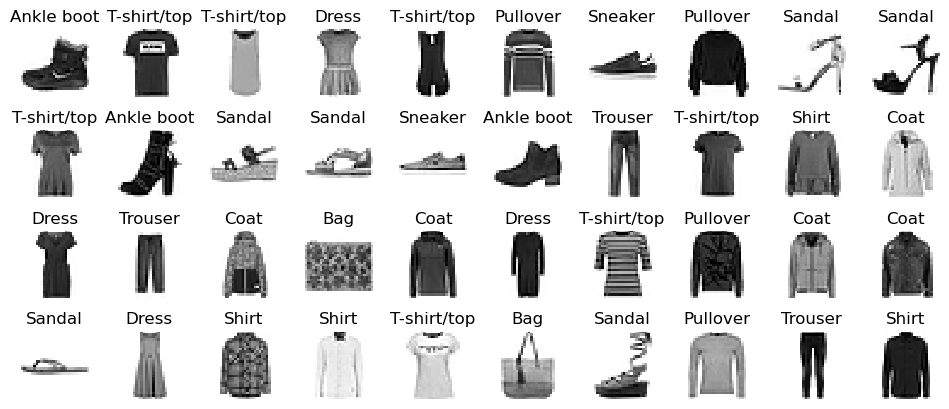

In [24]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the Sequential API

Now let’s build the neural network! Here is a classification MLP with two
hidden layers:

In [26]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one as we just did, it’s often more
convenient to pass a list of layers when creating the Sequential model. You
can also drop the Input layer and instead specify the shape in the first
layer:


In [29]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

The model’s summary() method displays all the model’s layers, including
each layer’s name (which is automatically generated unless you set it when
creating the layer), its output shape (None means the batch size can be
anything), and its number of parameters. The summary ends with the total
number of parameters, including trainable and non-trainable parameters. Here
we only have trainable parameters (you will see some non-trainable
parameters later in this chapter):

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


You can easily get a model’s list of layers using the layers attribute, or use
the get_layer() method to access a layer by name:


In [34]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer('dense') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the connection
weights and the bias terms:

In [37]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04967791,  0.0152236 ,  0.05474816, ..., -0.00568553,
         0.06268579,  0.06586623],
       [ 0.04261615,  0.05166072,  0.02823554, ...,  0.04721878,
         0.04293685, -0.07113168],
       [ 0.01227877,  0.04010788, -0.02280708, ..., -0.04947826,
        -0.06717753, -0.03161164],
       ...,
       [ 0.01668676,  0.0449297 ,  0.06802788, ...,  0.02372305,
        -0.01182356, -0.06809808],
       [ 0.02117955, -0.03813958, -0.06654359, ..., -0.05799491,
        -0.06274177,  0.01791232],
       [ 0.00991841, -0.04471413, -0.0693135 , ..., -0.00774183,
        -0.05449379, -0.03572326]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

**Note:** The shape of the weight matrix depends on the number of inputs, which is why we
specified the input_shape when creating the model. If you do not specify the input shape,
it’s OK: Keras will simply wait until it knows the input shape before it actually builds the
model parameters. This will happen either when you feed it some data (e.g., during
training), or when you call its build() method. Until the model parameters are built, you
will not be able to do certain things, such as display the model summary or save the
model. So, if you know the input shape when creating the model, it is best to specify it.

## Compiling the model

After a model is created, you must call its compile() method to specify the
loss function and the optimizer to use. Optionally, you can specify a list of
extra metrics to compute during training and evaluation:


In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


# extra code – the below code is equivalent to the previous code
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

The above code requires explanation. 

We use the
"sparse_categorical_crossentropy" loss because we have sparse labels (i.e.,
for each instance, there is just a target class index, from 0 to 9 in this case),
and the classes are exclusive. If instead we had one target probability per
class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0.,
0., 0., 0.] to represent class 3), then we would need to use the
"categorical_crossentropy" loss instead. If we were doing binary
classification or multilabel binary classification, then we would use the
"sigmoid" activation function in the output layer instead of the "softmax"
activation function, and we would use the "binary_crossentropy" loss.

Regarding the optimizer, "sgd" means that we will train the model using
stochastic gradient descent. In other words, Keras will perform the
backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus
gradient descent

Finally, since this is a classifier, it’s useful to measure its accuracy during
training and evaluation, which is why we set metrics=["accuracy"].).


In [44]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [46]:
# extra code – shows how to convert one-hot vectors to class ids
import numpy as np
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

## Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its fit()
method:

In [47]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6845 - loss: 1.0164 - val_accuracy: 0.8230 - val_loss: 0.5110
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8260 - loss: 0.5070 - val_accuracy: 0.8346 - val_loss: 0.4588
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8444 - loss: 0.4538 - val_accuracy: 0.8420 - val_loss: 0.4360
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8535 - loss: 0.4243 - val_accuracy: 0.8478 - val_loss: 0.4228
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.4029 - val_accuracy: 0.8508 - val_loss: 0.4110
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.3857 - val_accuracy: 0.8540 - val_loss: 0.4009
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3714 - val_accuracy: 0.8568 - val_loss: 0.3912
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8739 - loss: 0.3586 - 

And that’s it! The neural network is trained. At each epoch during training,
Keras displays the number of mini-batches processed so far on the left side of
the progress bar. The batch size is 32 by default, and since the training set has
55,000 images, the model goes through 1,719 batches per epoch: 1,718 of
size 32, and 1 of size 24. After the progress bar, you can see the mean
training time per sample, and the loss and accuracy (or any other extra
metrics you asked for) on both the training set and the validation set. Notice
that the training loss went down, which is a good sign, and the validation
accuracy reached 88.94% after 30 epochs. That’s slightly below the training
accuracy, so there is a little bit of overfitting going on, but not a huge
amount.

We pass it the input features (X_train) and the target classes (y_train), as well
as the number of epochs to train (or else it would default to just 1, which
would definitely not be enough to converge to a good solution). We also pass
a validation set (this is optional). Keras will measure the loss and the extra
metrics on this set at the end of each epoch, which is very useful to see how
well the model really performs. If the performance on the training set is much
better than on the validation set, your model is probably overfitting the
training set, or there is a bug, such as a data mismatch between the training
set and the validation set.


**Tip:** Shape errors are quite common, especially when getting started, so you should familiarize
yourself with the error messages: try fitting a model with inputs and/or labels of the wrong
shape, and see the errors you get. Similarly, try compiling the model with
loss="categorical_crossentropy" instead of loss="sparse_cat egorical_crossentropy". Or
you can remove the Flatten layer.


**Tip:** Instead of passing a validation set using the validation_data argument, you could set
validation_split to the ratio of the training set that you want Keras to use for validation.
For example, validation_split=0.1 tells Keras to use the last 10% of the data (before
shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented
and others underrepresented, it would be useful to set the class_weight
argument when calling the fit() method, to give a larger weight to
underrepresented classes and a lower weight to overrepresented classes.
These weights would be used by Keras when computing the loss. If you need
per-instance weights, set the sample_weight argument. If both class_weight
and sample_weight are provided, then Keras multiplies them. Per-instance
weights could be useful, for example, if some instances were labeled by
experts while others were labeled using a crowdsourcing platform: you might
want to give more weight to the former. You can also provide sample weights
(but not class weights) for the validation set by adding them as a third item in
the validation_data tuple.

The fit() method returns a History object containing the training parameters
(history.params), the list of epochs it went through (history.epoch), and most
importantly a dictionary (history.history) containing the loss and extra
metrics it measured at the end of each epoch on the training set and on the
validation set (if any). If you use this dictionary to create a Pandas DataFrame
and call its plot() method, you get the learning curves shown in the Figure below:

In [50]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

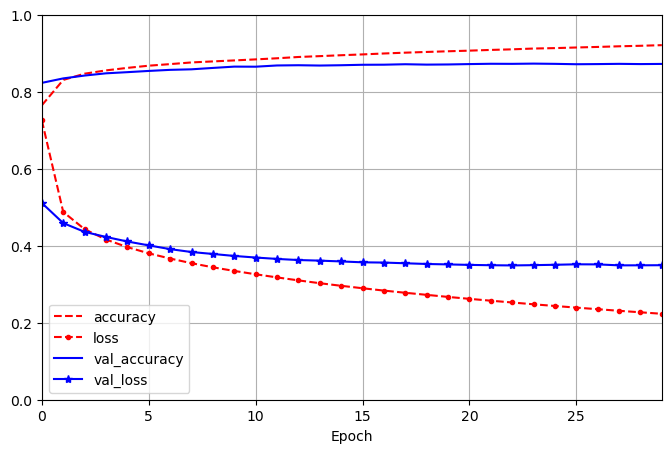

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  #
plt.show()


You can see that both the training accuracy and the validation accuracy
steadily increase during training, while the training loss and the validation
loss decrease. This is good. The validation curves are relatively close to each
other at first, but they get further apart over time, which shows that there’s a
little bit of overfitting. In this particular case, the model looks like it
performed better on the validation set than on the training set at the beginning
of training, but that’s not actually the case. The validation error is computed
at the end of each epoch, while the training error is computed using a running
mean during each epoch, so the training curve should be shifted by half an
epoch to the left. If you do that, you will see that the training and validation
curves overlap almost perfectly at the beginning of training.

    
The training set performance ends up beating the validation performance, as
is generally the case when you train for long enough. You can tell that the
model has not quite converged yet, as the validation loss is still going down,
so you should probably continue training. This is as simple as calling the fit()
method again, since Keras just continues training where it left off: you should
be able to reach about 89.8% validation accuracy, while the training accuracy
will continue to rise up to 100% (this is not always the case).

                                  
If you are not satisfied with the performance of your model, you should go
back and tune the hyperparameters. The first one to check is the learning rate.
If that doesn’t help, try another optimizer (and always retune the learning rate
after changing any hyperparameter). 

If the performance is still not great, then
try tuning model hyperparameters such as the number of layers, the number
of neurons per layer, and the types of activation functions to use for each
hidden layer. You can also try tuning other hyperparameters, such as the
batch size (it can be set in the fit() method using the batch_size argument,
which defaults to 32). We will get back to hyperparameter tuning at the end
of this chapter. 

Once you are satisfied with your model’s validation accuracy,
you should evaluate it on the test set to estimate the generalization error
before you deploy the model to production. You can easily do this using the
evaluate() method (it also supports several other arguments, such as
batch_size and sample_weight.

In [53]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3611


[0.36300474405288696, 0.8762999773025513]

It is common to get slightly lower performance on
the test set than on the validation set, because the hyperparameters are tuned
on the validation set, not the test set (however, in this example, we did not do
any hyperparameter tuning, so the lower accuracy is just bad luck).
Remember to resist the temptation to tweak the hyperparameters on the test
set, or else your estimate of the generalization error will be too optimistic.


## Using the model to make predictions

Now let’s use the model’s predict() method to make predictions on new
instances. Since we don’t have actual new instances, we’ll just use the last
three instances of the test set:


In [65]:
X_new = X_test[-3:]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([8, 1, 5], dtype=int64)

In [67]:
np.array(class_names)[y_pred]

array(['Bag', 'Trouser', 'Sandal'], dtype='<U11')

In [68]:
y_new = y_test[-3:]
y_new

array([8, 1, 5], dtype=uint8)

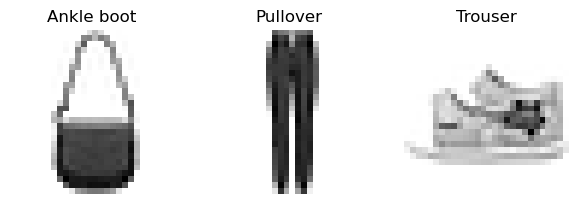

In [69]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Here, the classifier actually classified all three images correctly.

Now you know how to use the sequential API to build, train, and evaluate a
classification MLP. But what about regression?

# Building a Regression MLP Using the Sequential API

Let’s switch back to the California housing problem and tackle it using the
same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but
this time building it with Keras.

Using the sequential API to build, train, evaluate, and use a regression MLP
is quite similar to what we did for classification. The main differences in the
following code example are the fact that the output layer has a single neuron
(since we only want to predict a single value) and it uses no activation
function, the loss function is the mean squared error, the metric is the RMSE,
and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did.
Moreover, in this example we don’t need a Flatten layer, and instead we’re
using a Normalization layer as the first layer: it does the same thing as ScikitLearn’s StandardScaler, but it must be fitted to the training data using its
adapt() method before you call the model’s fit() method. (Keras has other
preprocessing layers which we will see othertimes). Let’s take a look:

Let's load, split and scale the California housing dataset:

In [70]:
# load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [73]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


In [74]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.2533 - loss: 1.6926 - val_RootMeanSquaredError: 0.6183 - val_loss: 0.3823
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6393 - loss: 0.4092 - val_RootMeanSquaredError: 1.0750 - val_loss: 1.1557
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6139 - loss: 0.3772 - val_RootMeanSquaredError: 1.3262 - val_loss: 1.7588
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6033 - loss: 0.3641 - val_RootMeanSquaredError: 1.1481 - val_loss: 1.3181
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5943 - loss: 0.3533 - val_RootMeanSquaredError: 0.9319 - val_loss: 0.8685
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5823 - loss: 0.3392 - val_RootMeanSquaredError: 0.7857 - val_loss: 0.6173
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5748 - los

In [75]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural
network. This neural network architecture was introduced in a 2016 paper by
Heng-Tze Cheng et al. It connects all or part of the inputs directly to the
output layer. This architecture makes it possible
for the neural network to learn both deep patterns (using the deep path) and
simple rules (through the short path). In contrast, a regular MLP forces all
the data to flow through the full stack of layers; thus, simple patterns in the
data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:


In [76]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [77]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

At a high level, the first five lines create all the layers we need to build the
model, the next six lines use these layers just like functions to go from the
input to the output, and the last line creates a Keras Model object by pointing
to the input and the output.

In [78]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 8)                 │              17 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             270 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             930 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ normalization[0][0],       │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [79]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.6513 - loss: 2.9245 - val_RootMeanSquaredError: 0.7117 - val_loss: 0.5066
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7206 - loss: 0.5211 - val_RootMeanSquaredError: 1.4104 - val_loss: 1.9891
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6507 - loss: 0.4240 - val_RootMeanSquaredError: 1.4234 - val_loss: 2.0261
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6288 - loss: 0.3956 - val_RootMeanSquaredError: 1.8607 - val_loss: 3.4621
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6201 - loss: 0.3847 - val_RootMeanSquaredError: 1.6198 - val_loss: 2.6237
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6072 - loss: 0.3689 - val_RootMeanSquaredError: 1.3365 - val_loss: 1.7862
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5981 - los

But what if you want to send a subset of the features through the wide path
and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs.
For example, suppose we want to send five features through the wide path
(features 0 to 4), and six features through the deep path (features 2 to 7). We
can do this as follows:


In [80]:
tf.random.set_seed(42)  # extra code

In [81]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Now we can compile the model as usual, but when we call the fit() method,
instead of passing a single input matrix X_train, we must pass a pair of
matrices (X_train_wide, X_train_deep), one per input. The same is true for
X_valid, and also for X_test and X_new when you call evaluate() or
predict():

In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.6803 - loss: 2.9979 - val_RootMeanSquaredError: 0.7766 - val_loss: 0.6031
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7417 - loss: 0.5509 - val_RootMeanSquaredError: 0.6862 - val_loss: 0.4708
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6762 - loss: 0.4575 - val_RootMeanSquaredError: 0.9091 - val_loss: 0.8264
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6540 - loss: 0.4280 - val_RootMeanSquaredError: 0.9243 - val_loss: 0.8543
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6403 - loss: 0.4102 - val_RootMeanSquaredError: 1.2213 - val_loss: 1.4917
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6329 - loss: 0.4008 - val_RootMeanSquaredError: 1.4987 - val_loss: 2.2461
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6306 - los

In [84]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5838 - loss: 0.3409


In [85]:
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [86]:
y_pred

array([[0.19852062],
       [1.3408195 ],
       [3.5714653 ]], dtype=float32)

**Tip:** Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary
{"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set
name="input_wide" and name="input_deep" when creating the inputs. This is highly
recommended when there are many inputs, to clarify the code and avoid getting the order
wrong.


There are also many use cases in which you may want to have multiple
outputs:
- The task may demand it. For instance, you may want to locate and
classify the main object in a picture. This is both a regression tasks and a
classification task.
- Similarly, you may have multiple independent tasks based on the same
data. Sure, you could train one neural network per task, but in many
cases you will get better results on all tasks by training a single neural
network with one output per task. This is because the neural network can
learn features in the data that are useful across tasks. For example, you
could perform multitask classification on pictures of faces, using one
output to classify the person’s facial expression (smiling, surprised, etc.)
and another output to identify whether they are wearing glasses or not.
- Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus improve the
model’s ability to generalize). For example, you may want to add an
auxiliary output in a neural network architecture to
ensure that the underlying part of the network learns something useful
on its own, without relying on the rest of the network.

Adding an auxiliary output for regularization:

Adding an extra output is quite easy: we just connect it to the appropriate
layer and add it to the model’s list of outputs.

In [87]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [88]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

**Warning**: in recent versions, Keras requires one metric per output, so I replaced `metrics=["RootMeanSquaredError"]` with `metrics=["RootMeanSquaredError", "RootMeanSquaredError"]` in the code below.

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [90]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - dense_2_RootMeanSquaredError: 1.8999 - dense_2_loss: 3.3473 - dense_3_RootMeanSquaredError: 2.0817 - dense_3_loss: 0.4437 - loss: 3.7910 - val_dense_2_RootMeanSquaredError: 0.9230 - val_dense_2_loss: 0.7665 - val_dense_3_RootMeanSquaredError: 2.6701 - val_dense_3_loss: 0.7126 - val_loss: 1.4796
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.8699 - dense_2_loss: 0.6821 - dense_3_RootMeanSquaredError: 0.9921 - dense_3_loss: 0.0986 - loss: 0.7807 - val_dense_2_RootMeanSquaredError: 0.8279 - val_dense_2_loss: 0.6167 - val_dense_3_RootMeanSquaredError: 1.2238 - val_dense_3_loss: 0.1497 - val_loss: 0.7666
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.7549 - dense_2_loss: 0.5132 - dense_3_RootMeanSquaredError: 0.7956 - dense_3_loss: 0.0633 - loss: 0.5765 - val_dense_2_RootMeanSquaredError: 0.7181 - val_dense_2_loss: 0.4641 - val_dense_3_RootMeanSquaredError: 1.1

When we evaluate the model, Keras returns the weighted sum of the losses,
as well as all the individual losses and metrics:


In [92]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_RootMeanSquaredError: 0.5679 - dense_2_loss: 0.2904 - dense_3_RootMeanSquaredError: 0.6239 - dense_3_loss: 0.0389 - loss: 0.3293


Similarly, the predict() method will return predictions for each output:


**TIP:**
If you set return_dict=True, then evaluate() will return a dictionary instead of a big tuple.


y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

In [94]:
y_pred_main

array([[0.58680797],
       [1.3303435 ],
       [3.7028759 ]], dtype=float32)

In [95]:
y_pred_aux

array([[0.705457 ],
       [1.3578792],
       [3.4309156]], dtype=float32)

The predict() method returns a tuple, and it does not have a return_dict
argument to get a dictionary instead. However, you can create one using
model.output_names:

In [96]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [97]:
y_pred_tuple

[array([[0.58680797],
        [1.3303435 ],
        [3.7028759 ]], dtype=float32),
 array([[0.705457 ],
        [1.3578792],
        [3.4309156]], dtype=float32)]

In [98]:
y_pred

{'dense_2': array([[0.58680797],
        [1.3303435 ],
        [3.7028759 ]], dtype=float32),
 'dense_3': array([[0.705457 ],
        [1.3578792],
        [3.4309156]], dtype=float32)}

As you can see, you can build all sorts of architectures with the functional
API. Next, we’ll look at one last way you can build Keras models.

# Using the Subclassing API to Build Dynamic Models

Both the sequential API and the functional API are declarative: you start by
declaring which layers you want to use and how they should be connected,
and only then can you start feeding the model some data for training or
inference. This has many advantages: the model can easily be saved, cloned,
and shared; its structure can be displayed and analyzed; the framework can
infer shapes and check types, so errors can be caught early (i.e., before any
data ever goes through the model). It’s also fairly straightforward to debug,
since the whole model is a static graph of layers. But the flip side is just that:
it’s static. Some models involve loops, varying shapes, conditional branching,
and other dynamic behaviors. For such cases, or simply if you prefer a more
imperative programming style, the subclassing API is for you.

With this approach, you subclass the Model class, create the layers you need
in the constructor, and use them to perform the computations you want in the
call() method. For example, creating an instance of the following
WideAndDeepModel class gives us an equivalent model to the one we just
built with the functional API:


In [102]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [103]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))



Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 1.8374 - RootMeanSquaredError_1: 2.2616 - loss: 3.7048 - mse_loss: 0.5188 - val_RootMeanSquaredError: 1.0758 - val_RootMeanSquaredError_1: 2.7971 - val_loss: 1.8239 - val_mse_loss: 0.7820
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7888 - RootMeanSquaredError_1: 0.9912 - loss: 0.6589 - mse_loss: 0.0984 - val_RootMeanSquaredError: 1.1467 - val_RootMeanSquaredError_1: 1.4499 - val_loss: 1.3936 - val_mse_loss: 0.2101
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7077 - RootMeanSquaredError_1: 0.8293 - loss: 0.5197 - mse_loss: 0.0688 - val_RootMeanSquaredError: 1.4267 - val_RootMeanSquaredError_1: 0.7985 - val_loss: 1.8957 - val_mse_loss: 0.0637
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6729 - RootMeanSquaredError_1: 0.7823 - loss: 0.4689 - mse_loss: 0.0612 - val_RootMeanSquaredError: 1.8334 - val_RootMeanSquaredEr

In [104]:

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep)) 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6039 - RootMeanSquaredError_1: 0.6673 - loss: 0.3729 - mse_loss: 0.0445
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
